# Introduction

In this notebook, we cover the foundations of neural networks.

We start by talking about **biological neurons** and how they inspired a very simple type of neuron: **the Perceptron**. We will show that a Perceptron is really a linear classifier.

If you create a **Perceptron Network**, you end up with a more complex linear classifier.

Linear classifiers are very useful, but can't solve all problems. To modify a perceptron to make it even more powerful, we look at the **Activation Function**. The activation function takes you from the input to the output. In the case of a perceptron, it's a simple step function. If you change this activation slightly to make it a continuous function, it has very attractive mathematical properties.

In particular, we talk about the sigmoid activation function. This allows us to create a **Sigmoid Neuron**, which we can put together to create a neural network. We will discuss the **Neural Network Architecture** and the key challenges of training them.

A reasonably sized NN could have millions of parameters. Given training data, one of the goals is to find the parameters of NN that are going to perform the mapping of input to output with a high level of reliability and accurancy. For that, we use a technique called **Gradient Descent**. In practice, gradient descent is performed using **Backpropagation**. Backpropagation is a technique based on the Chain Rule for Derivatives (and is something we will only briefly mention, providing further resources for the mathematicians amongst us).

# 1. Perceptron

A Perceptron takes several inputs and gives a single binary output:

<img src="perceptron_inputs_outputs.png" width="500" style="display: block; margin: 0 auto" />

$$
f = \begin{cases}
   0 &\text{if } \sum_{\substack{j}}w_{j}x_{j} \leq -b \\
   1 &\text{if } \sum_{\substack{j}}w_{j}x_{j} \gt -b
\end{cases}
= \begin{cases}
   0 &\text{if } \bold{w.b} + b \leq 0 \\
   1 &\text{if } \bold{w.b} + b \gt 0
\end{cases}
$$

where $w_{j} = \text{weights and } b = \text{bias}$.

The output of a neuron is also referred to as its **activation**. If we let $z = \bold{w.x} + b$, we can rewrite the above as:
$$
a = f(z) = \begin{cases}
   0 &\text{if } z \leq 0 \\
   1 &\text{if } z \gt 0
\end{cases}
$$
$f$ is a **step function**, and is called the **activation function** of this neuron.

## 1.1 Example

Suppose I want to answer the question: *"Will Liza go to Emma's party?"*
<img src="emmas_party.png" width="500" style="display: block; margin: 0 auto">

If Hannah goes, Liza really doesn't want to go.
But if Kristine goes, Liza would quite like to go, i.e. $w_1 = -3$, $w_2 = 2$.
And if neither of them go, Liza would like to stay home, i.e. $b = -1$.

So if both Hannah and Kristine are going, Liza isn't:
<img src="emmas_party_2.png" width="500" style="display: block; margin: 0 auto">

$
z = x_{1}w_{1} + x_{2}w_{2} + b = 1(-3) + 1(2) - 1 = -2
a = f(z) = 0
$

## 1.2 Perceptron as a Linear Classifier

Graphing the above example, we see that a Perceptron is simply a linear classifier.

<img src="linear_classifier.png" width="500" style="display: block; margin: 0 auto">

## 1.3 Perceptron in Code

TODO: explain what below code is doing?

In [ ]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """

    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    # Train the perceptron
    def fit(self, X, y):
        """Fits training data.
        This function take the input of features,
        make predictions, update the weights n_iter times.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """

        # initializing the weights
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        # print("Weights:", self.w_)

        for _ in range(self.n_iter):
            error = 0
            for xi, target in zip(X, y):

                # 1. calculate y^
                y_pred = self.predict(xi)

                # 2. calculate Update
                # update = η * (y - y^)
                update = self.eta * (target - y_pred)

                # 3. Update the weights
                # Wi = Wi + Δ(Wi)       where  Δ(Wi) = update * Xi
                self.w_[1:] = self.w_[1:] + update * xi
                # print(self.w_[1:])

                # Xo = 1 => update * 1 = update
                self.w_[0] = self.w_[0] + update

                # update != 0  ==>  y^ != y  ==>  there is an error
                error += int(update != 0.0)

            self.errors_.append(error)

        return self

    # Weighted Sum
    def net_input(self, X):
        """
        The net_input() function returns the dot product
        i.e. the weighted sum: sum of w*x
        :param: X: an array of features (inputs)
        Returns:
            the dot product of W and X
        """
        # Z = sum (Wi * Xi) where Wo = 0 et Xo = 1
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # Step Function
    def predict(self, X):
        """
        The activation function.
        Returns the predicted value
        :param X: an array of features
        :return:
            y_pred - the predicted value:
                0 if the weighted sum < 0
                1 otherwise
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# 2. Perceptron Network

Some regions are impossible to classify with just one Perceptron, for example the figure below.

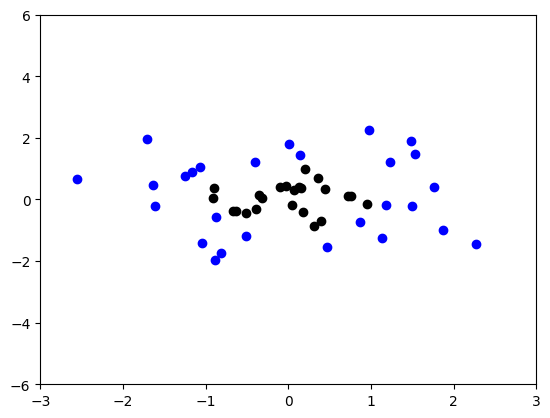

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(0)
n_samples = 50
X = np.random.randn(n_samples, 2)
y = np.zeros(n_samples)
y[np.linalg.norm(X, axis=1) > 1] = 1

# Plot the data
plt.scatter(X[y==0, 0], X[y==0, 1], color='black')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')

plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.savefig('complex_region.png')
plt.show()

In this scenario, we could use 4 linear classifiers 

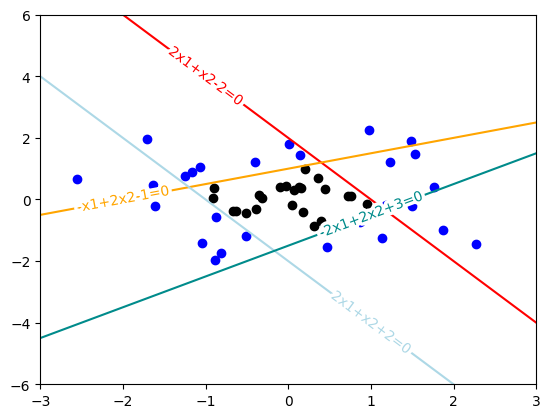

In [28]:
from labellines import labelLines

# Plot the data
plt.scatter(X[y==0, 0], X[y==0, 1], color='black')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')

# linear classifications
t = np.linspace(-3, 3, 100)
plt.plot(t, -2*t+2, linestyle='-', color='red', label='2x1+x2-2=0') # 2x1 + x2 - 2 = 0
plt.plot(t, 0.5*t+1, linestyle='-', color='orange', label='-x1+2x2-1=0') # - x1 + 2x2 - 1 = 0
plt.plot(t, -2*t-2, linestyle='-', color='lightblue', label='2x1+x2+2=0') # 2x1 + x2 + 2 = 0
plt.plot(t, 1*t-1.5, linestyle='-', color='darkcyan', label='-2x1+2x2+3=0') # - 2x1 + 2x2 + 3 = 0

labelLines(plt.gca().get_lines(), align=True, xvals=[-1, -2, 1, 1])

plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.savefig('complex_region_classifier.png')
plt.show()

Here if you get an output of 1 from each of these linear classifiers only if the point lies inside the region. If all the perceptrons produce a 1, the output nepceptron and weights will be set can be set such that it produces an output of 1 only in the case when all the inputs to it are 1.

While this is shown in 2D space, it generalises in any number of dimensions.

<img src="complex_classifier_perceptron_diagram.png" width="1000" style="display: block; margin: 0 auto">

A multi-layer perceptron network has the same general structure:

<img src="multi_layer_perceptron_network.avif" width="700" style="display: block; margin: 0 auto">

The above diagram is also known as a **fully-connected network** because every neuron is connected to every other neuron. This does not have to be the case, which we will demonstrate later.

*TODO: change the image to label w_11 etc*

# 3. Activation Function

## 3.1 Step Function

The activation function is the function that takes you from the input to the output. For a Perceptron, it is the step function.

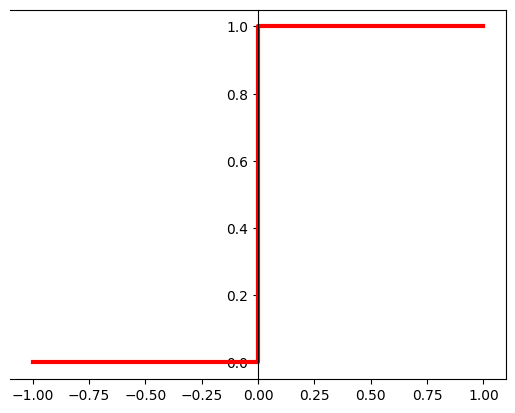

In [58]:
import matplotlib.pyplot as plt

x = [-1, 0, 1] 
y = [0, 0, 1]

fig, ax = plt.subplots()
ax.step(x, y, color='red', linewidth=3)

# Move the y-axis ticks to the center
ax.spines['left'].set_position('center')


So far, we have assumed we live in the perfect world where we know all the weights and biases. In reality, we need to find them. 

This is done by randomly assigning weights and biases.
Why?
Because we don't know where else to start.
Then we run the network on each training example, compare the output and the desired output, and adjust the weights to minimise the error.

We want to find the weights and biases of the entire network, i.e. the **parameters of the network**. 
Starting from a random value, we we need to see what the impact of changing a particular parameter is (e.g. $w_{1,1}).
We want a small change in a parameter to lead to a small change in the activation towards the desired activation.

This is where we encounter our first problem with perceptrons: their activation function is a step function.

*TODO: insert diagram with 2 inputs to 1 perceptron, labelled w1, w2, etc*


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def step_function(x):
    return np.where(x > 0, 1, 0)

# Define the function to plot
def plot_sine(delta_z):

    # plot step function
    x = [-0.55, 0, 0.45] 
    y = [0, 0, 1]
    plt.step(x, y, color='black', linewidth=3)

    # plot the starting point
    z0 = -0.05
    z = z0 + delta_z
    plt.plot(z0, step_function(z0), 'ro', markerfacecolor='none')
    plt.text(z0, step_function(z0) - 0.2, rf'$z_0 = {z0}$', fontsize=12, ha='center')

    # plot the moving point
    plt.plot(z, step_function(z), 'ro')
    plt.text(z, step_function(z) + 0.2, rf'$z = z_0 + \Delta z = {z:.2f}$', fontsize=12, ha='right')

    plt.ylim(-1, 2)
    plt.xlabel(r'$z = \mathbf{w \cdot x} + b$')
    plt.ylabel(r'$a = f(z)$')
    plt.title(rf'Impact of changing $z$ on activation')
    plt.show()

# Create the slider
slider = FloatSlider(min=-0.15, max=0.5, step=0.01, value=0)

# Create the interactive plot
interact(plot_sine, delta_z=slider)

interactive(children=(FloatSlider(value=0.0, description='delta_z', max=0.5, min=-0.15, step=0.01), Output()),…

<function __main__.plot_sine(delta_z)>

Say we change $w_1$ by $\Delta w_1$, which will change $z$, which will impact $a = f(z)$. 
If we move the slider to the left, $z$ changes (red dot moves left), but the activation $a$ does not change: it was 0 before, but because $z < 0$, it remains unchanged at 0.
If we move the slider slightly to the right, $a$ does not change either.
We changed $w_1$ (and therefore $z$) in both ways and learned nothing about the impact of $w_1$.

If you move the slider further to the right, all of a sudden $z > 0$ and $a = 1$.

With the step function as the activation function, it's difficult to figure out how to adjust the weights and biases to get the desired activation/output.
There is a lack of change or the sudden change in the output with a small change in the parameters.
This is even more the case with a network of perceptrons.

Since the step function is difficult to work with, we want to work with smoother functions, like the sigmoid function.

## 3.2 Sigmoid Function

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the function to plot
def plot_sine(delta_z):

    # plot step function
    x = np.linspace(-20, 20, 100)
    y = sigmoid(x)

    fig, ax = plt.subplots()
    ax.plot(x, y, color='black', linewidth=3)

    # Move the y-axis ticks to the center
    ax.spines['left'].set_position('center')

    # plot the starting point
    z0 = -0.05
    z = z0 + delta_z
    ax.plot(z0, sigmoid(z0), 'ro', markerfacecolor='none')
    ax.text(z0, sigmoid(z0) - 0.2, rf'$z_0 = {z0}$', fontsize=12, ha='center')

    # plot the moving point
    ax.plot(z, sigmoid(z), 'ro')
    ax.text(z, sigmoid(z) + 0.2, rf'$z = z_0 + \Delta z = {z:.2f}$', fontsize=12, ha='right')

    ax.set_ylim([-0.5, 1.5])
    # ax.set_xlim([0, 12])
    # ax.ylim(-1, 2)
    # ax.xlabel(r'$z = \mathbf{w \cdot x} + b$')
    # ax.ylabel(r'$a = f(z)$')
    ax.set_title(rf'Impact of changing $z$ on activation')
    plt.show()

# Create the slider
slider = FloatSlider(min=-7, max=15, step=0.1, value=0)

# Create the interactive plot
interact(plot_sine, delta_z=slider)

interactive(children=(FloatSlider(value=0.0, description='delta_z', max=15.0, min=-7.0), Output()), _dom_class…

<function __main__.plot_sine(delta_z)>

The sigmoid neuron is almost exactly the same as a perceptron, but the activation function is the sigma function $\sigma$.

$$
a = \sigma (z) = \frac{1}{1 + e^{-z}}
$$

Sigma looks like a "blurred" or smoother version of the step function. 
Its behaviour is muh more benign and predictable: when you change $w_1$, you have a measurable change in the output $a$.
The output transitions more smoothly with respect to changes in parameters (weights and biases).

The sigma function is one of many different types of smooth activation functions used in neural networks. Other examples include:

$$
\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$$
$$
\frac{d}{dx}\tanh(x) = 1 - \tanh^2(x)
$$
$$
\text{Swish}(x) = x \cdot \frac{1}{1 + e^{-\beta x}}
$$
$$
\text{ELU}(x) = \begin{cases} x, & \text{if } x > 0 \\ \alpha (e^x - 1), & \text{otherwise} \end{cases}
$$

# 4. Neural Network

Now we have a neural network that uses the sigmoid activation function.
What shall we do with all this power?

## 4.1 MNIST Handwritten Digit Recognition

This is a classic problem for neural networks. 

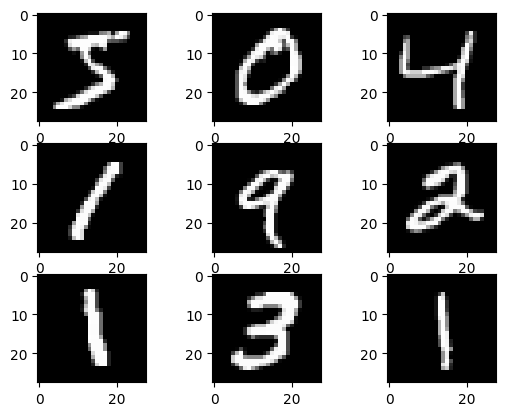

In [1]:
# Plot of images as baseline for comparison 
from keras.datasets import mnist 
from matplotlib import pyplot 
# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
# create a grid of 3x3 images 
for i in range(0, 9): 
    pyplot.subplot(330 + 1 + i) 
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

Each digit has been binarised and rescaled into an image roughly 20x20 pixels, which is centred in a larger image of 28x28 pixels.

We want to develop a neural network where it takes one of these images as input. The idea is to have the neural network have a high activation/output for the digit that it thinks the input corresponds to, and a low output for all the other digits.

*TODO: insert image of architecture we'll be using*

In Section 3, we introduced the idea of finding the parameters of the network by starting with a random set and adjusting them to get to the desired activation.
How do we change the weights and biases in such a way that our activations/outputs end up approaching the desired activations? 
This is the process of training.

The key to any network is lots of training data - the more the better.
The training data in this case is pairs out inputs and outputs, labels by users/experts, which are converted to the desired activation.

*TODO: insert diagram of inputs, labels and desired activations here*

*TODO: insert diagram of training process here*

1. Initialise the weights and biases of network with random values.
2. Compute network activation (output) for each training image.
This is just a feed forward process: for each image, run it through the network and get an activation and the output.
3. Compute the cost for the entire training data.
By doing this you get an activation for each training image, not the desired activation. We see the activation that this particular instance of the network is going to give you.
Using all these activations, you can compute the cost for the entire training data.
The weaker the performance of the network, the larger the cost.
Lower the cost, better the classification.
We're looking for the ws and bs that give us the minimum cost. We lower the cost, the classification improves and the performance of the network improves.
4. Update weights and biases using Gradient Descent.
Using the cost, we can adjust the weights and biases of the network using a method called Gradient Descent.
5. Repeat steps 2-4 until the cost reduces to an acceptable network, then you freeze the network.